# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [20]:
!pip3 install scikit-image opencv-python imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=3513c64d6da3ffbeedf61dbdcde04127c3444e6de370ee88479b3a49cb1f3237
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [91]:
import pandas as pd
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

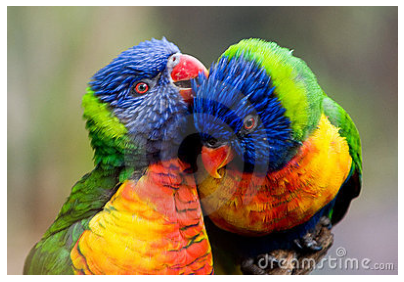

In [14]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [8]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(275, 400, 3)


In [42]:
img = img.reshape(-1, 3)

Опробуем KMeans:

clusters:2 SSIM:0.5335125364634673


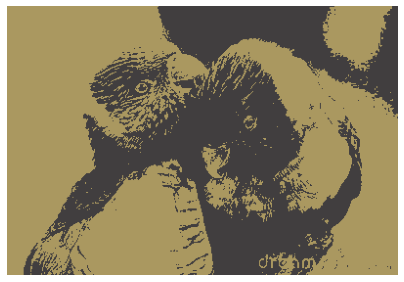

clusters:3 SSIM:0.5634940373793377


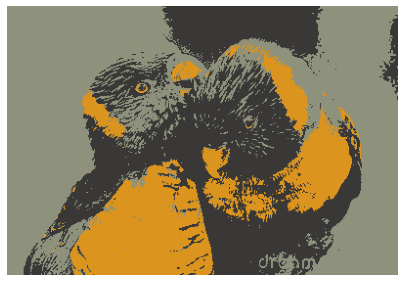

clusters:10 SSIM:0.6826600629751015


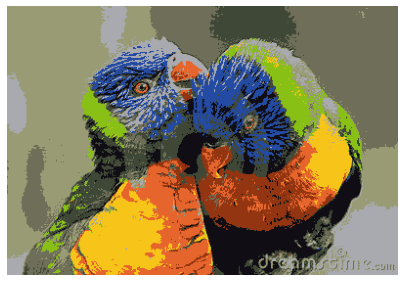

clusters:20 SSIM:0.7612473303876429


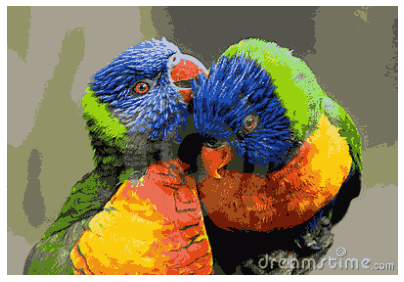

In [38]:
clusters = [2, 3, 10, 20]
for k in clusters:
    m = 0
    for j in range(10):
        summary = np.zeros([k, 3])
        amount = np.zeros([k, 3], int)
        model = KMeans(n_clusters = k)
        y_pred = model.fit_predict(img)
        for i, j in enumerate(y_pred):
            summary[j] += img[i]
            amount[j] += 1
        paintings = summary / amount
        img1 = img.copy()
        for i, j in enumerate(y_pred):
            img1[i] = paintings[j]
        sim = ssim(img.reshape(275, 400, 3), img1.reshape(275, 400, 3), multichannel = True)
        if sim > m:
            m = sim
            best_img = img1.reshape(275, 400, 3)
    print(f'clusters:{k} SSIM:{m}')
    draw_picture(best_img)

Теперь Agglomerative:

clusters:2 metric:single SSIM:0.40523808440211345


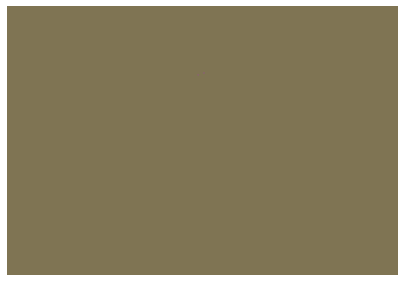

clusters:3 metric:single SSIM:0.4052667310455096


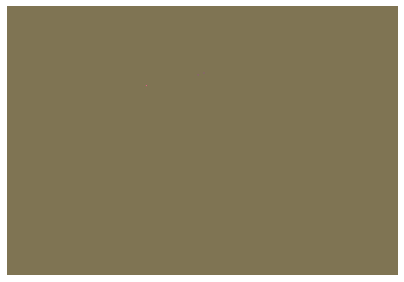

clusters:10 metric:single SSIM:0.40548472639666494


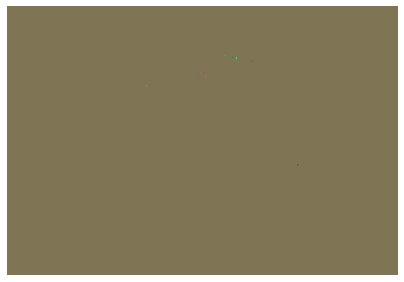

clusters:20 metric:single SSIM:0.40555224992024064


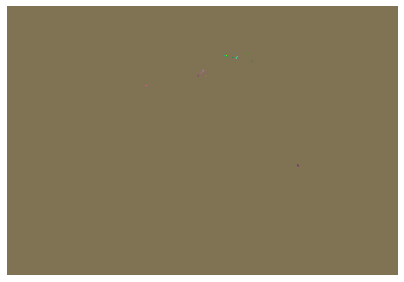

In [51]:
clusters = [2, 3, 10, 20]
metrics = ['single']
for k in clusters:
    for met in metrics:
        summary = np.zeros([k, 3])
        amount = np.zeros([k, 3], int)
        model = AgglomerativeClustering(n_clusters = k, linkage=met)
        y_pred = model.fit_predict(img)
        for i, j in enumerate(y_pred):
            summary[j] += img[i]
            amount[j] += 1
        paintings = summary / amount
        img1 = img.copy()
        for i, j in enumerate(y_pred):
            img1[i] = paintings[j]
        sim = ssim(img.reshape(275, 400, 3), img1.reshape(275, 400, 3), win_size =3)
        print(f'clusters:{k} metric:{met} SSIM:{sim}')
        draw_picture(img1.reshape(275, 400, 3))

К сожалению данный метод отказывается работать с любой метрикой, кроме single

DBSCAN:

eps:0.1 min_samples:1 SSIM:1.0 clusters:67183


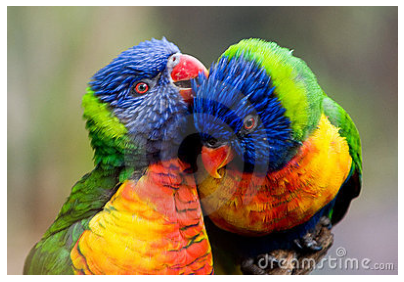

eps:0.1 min_samples:2 SSIM:0.5506487339835935 clusters:10527


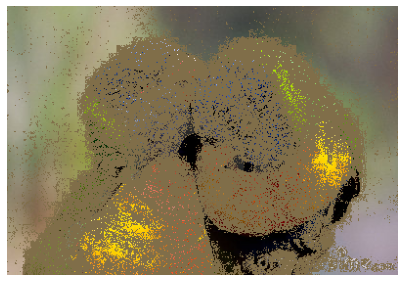

eps:0.1 min_samples:3 SSIM:0.4853496733499215 clusters:5732


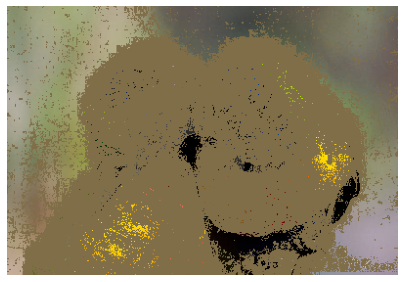

eps:0.1 min_samples:4 SSIM:0.4595823125092322 clusters:4130


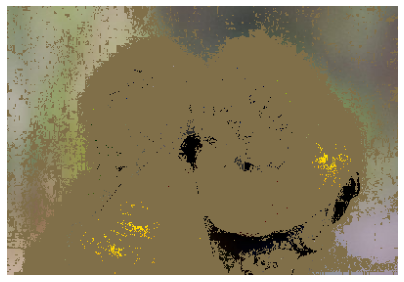

eps:0.2 min_samples:1 SSIM:1.0 clusters:67183


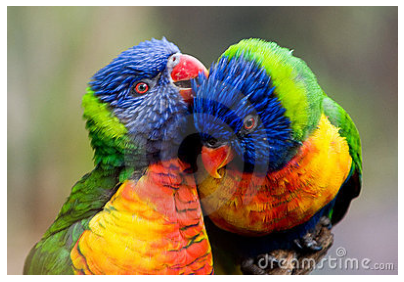

eps:0.2 min_samples:2 SSIM:0.5506487339835935 clusters:10527


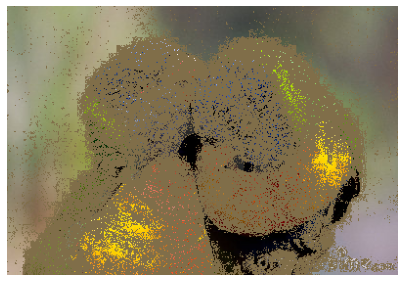

eps:0.2 min_samples:3 SSIM:0.4853496733499215 clusters:5732


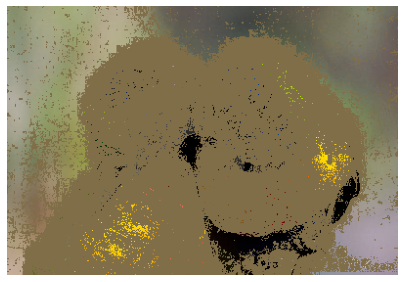

eps:0.2 min_samples:4 SSIM:0.4595823125092322 clusters:4130


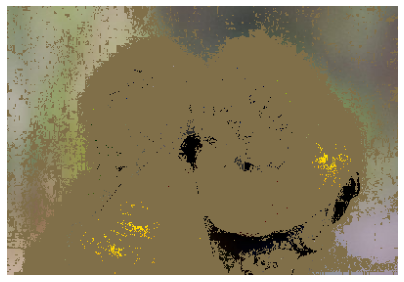

eps:0.30000000000000004 min_samples:1 SSIM:1.0 clusters:67183


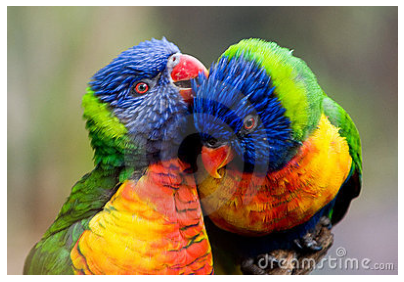

eps:0.30000000000000004 min_samples:2 SSIM:0.5506487339835935 clusters:10527


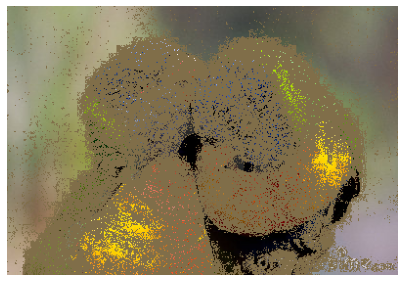

eps:0.30000000000000004 min_samples:3 SSIM:0.4853496733499215 clusters:5732


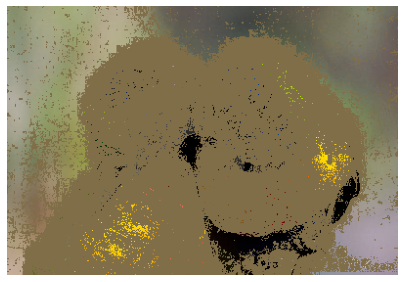

eps:0.30000000000000004 min_samples:4 SSIM:0.4595823125092322 clusters:4130


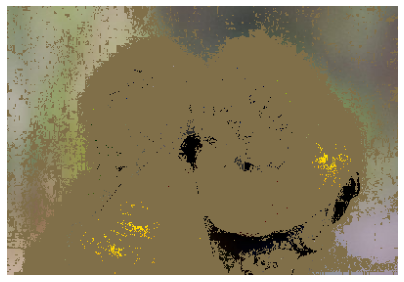

eps:0.4 min_samples:1 SSIM:1.0 clusters:67183


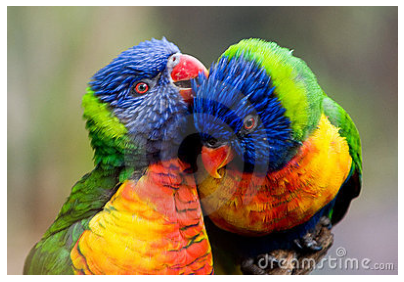

eps:0.4 min_samples:2 SSIM:0.5506487339835935 clusters:10527


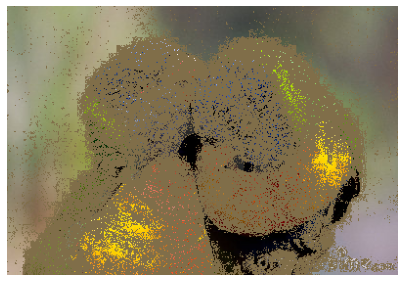

eps:0.4 min_samples:3 SSIM:0.4853496733499215 clusters:5732


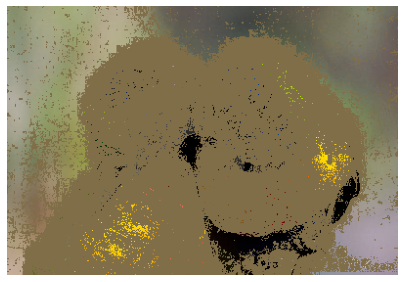

eps:0.4 min_samples:4 SSIM:0.4595823125092322 clusters:4130


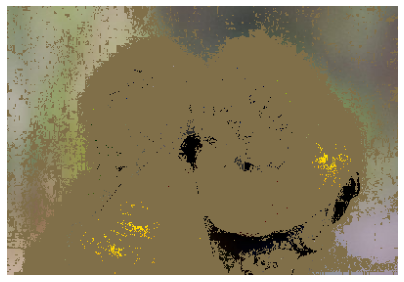

eps:0.5 min_samples:1 SSIM:1.0 clusters:67183


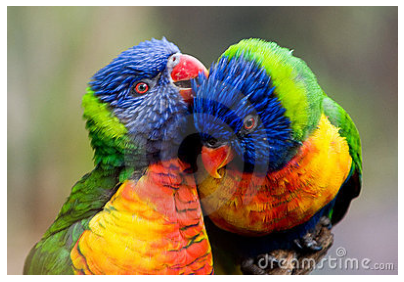

eps:0.5 min_samples:2 SSIM:0.5506487339835935 clusters:10527


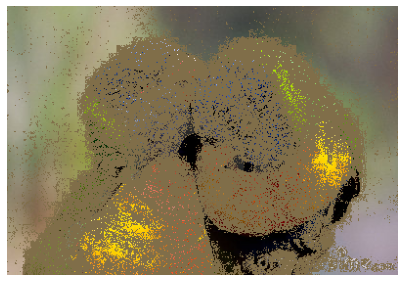

eps:0.5 min_samples:3 SSIM:0.4853496733499215 clusters:5732


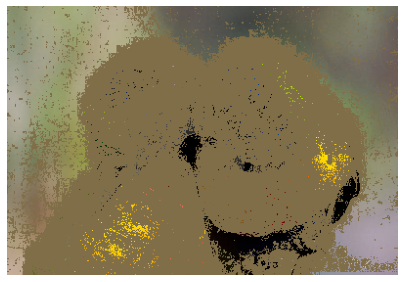

eps:0.5 min_samples:4 SSIM:0.4595823125092322 clusters:4130


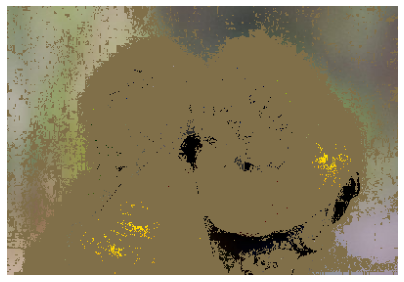

In [60]:
environs = np.arange(0.1, 0.6, 0.1)
min_samples = list(range(1, 5))
for eps in environs:
    for samples in min_samples:
        model = DBSCAN(eps = eps, min_samples=samples)
        y_pred = model.fit_predict(img)
        n_clusters = np.unique(y_pred).shape[0]
        summary = np.zeros([n_clusters, 3])
        amount = np.zeros([n_clusters, 3], int)
        for i, j in enumerate(y_pred):
            summary[j] += img[i]
            amount[j] += 1
        paintings = summary / amount
        img1 = img.copy()
        for i, j in enumerate(y_pred):
            img1[i] = paintings[j]
        sim = ssim(img.reshape(275, 400, 3), img1.reshape(275, 400, 3), win_size =3)
        print(f'eps:{eps} min_samples:{samples} SSIM:{sim} clusters:{n_clusters}')
        draw_picture(img1.reshape(275, 400, 3))

Получается что-то хорошее только при min_samples=1 (Подозреваю, что в этом случае алгоритм раскрашивает всё своими цветами)

Пробую KMeans на своей картинке:

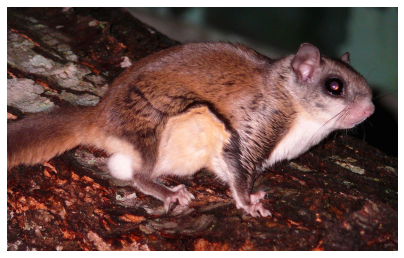

In [143]:
img = cv2.imread('example.jpg')
draw_picture(img)

In [145]:
origin = img.shape
origin

(640, 1024, 3)

In [146]:
img = img.reshape(-1, 3)

clusters:2 SSIM:0.49413814942787265


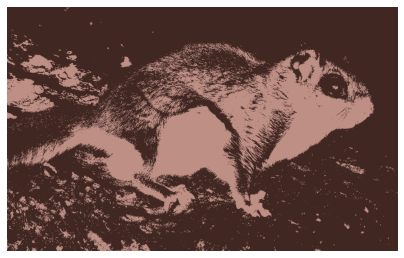

clusters:3 SSIM:0.6174419199051536


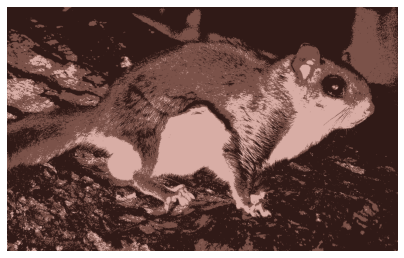

clusters:10 SSIM:0.8343954653066179


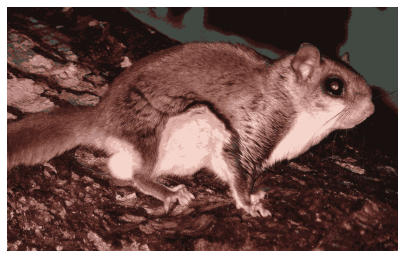

clusters:20 SSIM:0.8778479399682305


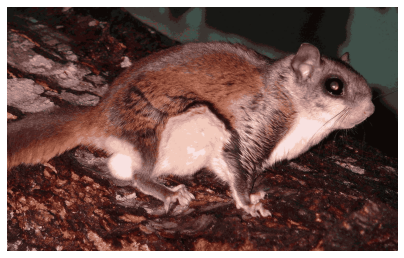

In [147]:
clusters = [2, 3, 10, 20]
for k in clusters:
    m = 0
    for j in range(10):
        summary = np.zeros([k, 3])
        amount = np.zeros([k, 3], int)
        model = KMeans(n_clusters = k)
        y_pred = model.fit_predict(img)
        for i, j in enumerate(y_pred):
            summary[j] += img[i]
            amount[j] += 1
        paintings = summary / amount
        img1 = img.copy()
        for i, j in enumerate(y_pred):
            img1[i] = paintings[j]
        sim = ssim(img.reshape(origin), img1.reshape(origin), multichannel = True)
        if sim > m:
            m = sim
            best_img = img1.reshape(origin)
    print(f'clusters:{k} SSIM:{m}')
    draw_picture(best_img)

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [64]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [65]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [67]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [68]:
y.shape

(2370,)

In [69]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

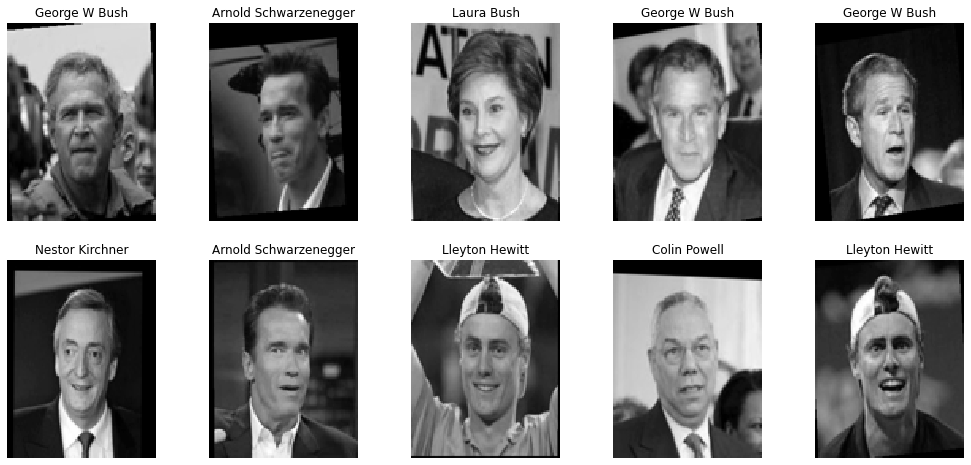

In [113]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

Без уменьшения размерности:

для penalty = None:

In [148]:
C = np.arange(0.1, 1.0, 0.1)
best_score = 0
for c in C:
    model = LogisticRegression(C = c, max_iter = 500).fit(X_train, y_train)
    tmp = accuracy_score(model.predict(X_test), y_test)
    if tmp > best_score:
        best_score = tmp
        best_c = c

In [149]:
print(best_score, best_c)

0.679324894514768 0.5


penalty = l2:

In [74]:
C = np.arange(0.1, 1.0, 0.1)
best_score = 0
for c in C:
    model = LogisticRegression(penalty = 'l2', C = c).fit(X_train, y_train)
    tmp = accuracy_score(model.predict(X_test), y_test)
    if tmp > best_score:
        best_score = tmp

In [75]:
print(best_score)

0.6540084388185654


In [136]:
def mistakes_5(y_pred, test_data = True):
    c = 0
    mass = []
    for i, j in enumerate(y_pred):
        if j != y_test[i]:
            mass.append([i + y_train.shape[0] * test_data, j])
            c += 1
        if c == 5:
            break
    print(f'Предсказано:{[names[i[1]] for i in mass]}')
    plot_grid([i[0] for i in mass], 1, 5)

In [78]:
model = LogisticRegression(max_iter=500, C= 0.1).fit(X_train, y_train)
y_pred = model.predict(X_test)

Предсказано:['George W Bush', 'Kofi Annan', 'George W Bush', 'Junichiro Koizumi', 'Ariel Sharon']


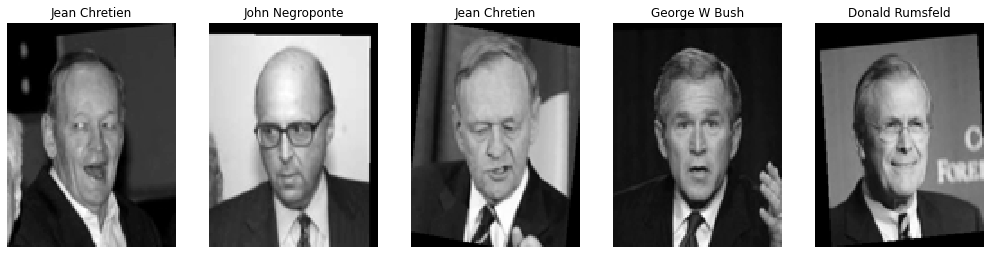

In [122]:
mistakes_5(y_pred)

Пробуем Константный:

In [85]:
df = pd.DataFrame({'names':y_train})
df.value_counts()

names
8        417
5        195
31       110
7         92
9         87
13        59
3         59
28        45
15        45
19        43
17        41
33        41
14        40
23        38
16        38
10        36
21        34
0         34
4         33
12        33
22        31
29        29
2         29
27        28
30        28
18        27
1         27
25        27
32        27
6         26
24        26
20        25
11        24
26        22
dtype: int64

In [86]:
y

array([ 8,  4, 21, ...,  8, 10,  8], dtype=int64)

In [87]:
y_pred1 = np.zeros([y.shape[0]], int) + 8

In [89]:
accuracy_score(y, y_pred1)

0.22362869198312235

Константный предсказатель не слишком хорошо справляется с задачей.

Пробуем SVD, т.к. он может преобразовывать в пространства размерности большей 3, и этот алгоритм наиболее понятен мне с точки зрения теории.

In [96]:
dim = range(2, 20, 2)
b_s = 0
for d in dim:
    sing = TruncatedSVD(n_components = d)
    X_train_sing = sing.fit_transform(X_train)
    X_test_sing = sing.fit_transform(X_test)
    m = LogisticRegression(max_iter = 500, C = 0.1).fit(X_train_sing, y_train)
    y_pred = m.predict(X_test_sing)
    tmp = accuracy_score(y_pred, y_test)
    if tmp > b_s:
        b_s = tmp
        b_dim = d
        y_pred2 = y_pred

In [100]:
b_s, b_dim

(0.24472573839662448, 4)

Предсказано:['George W Bush', 'Jennifer Capriati', 'Colin Powell', 'Jennifer Capriati', 'George W Bush']


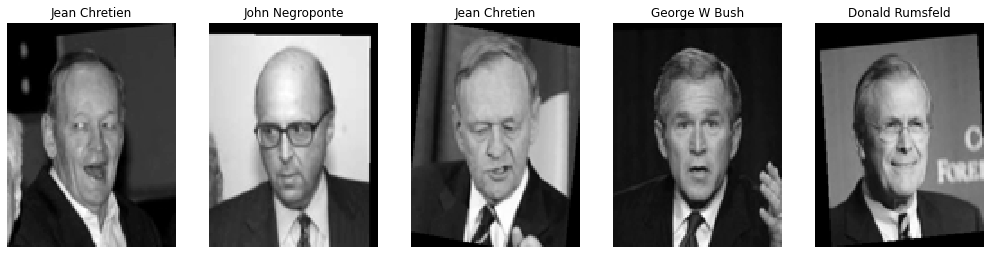

In [123]:
mistakes_5(y_pred2)

Визуализация: используем t-SNE

In [128]:
from sklearn.manifold import TSNE
from matplotlib.colors import Normalize

In [125]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [127]:
np.unique(y).shape[0]

34

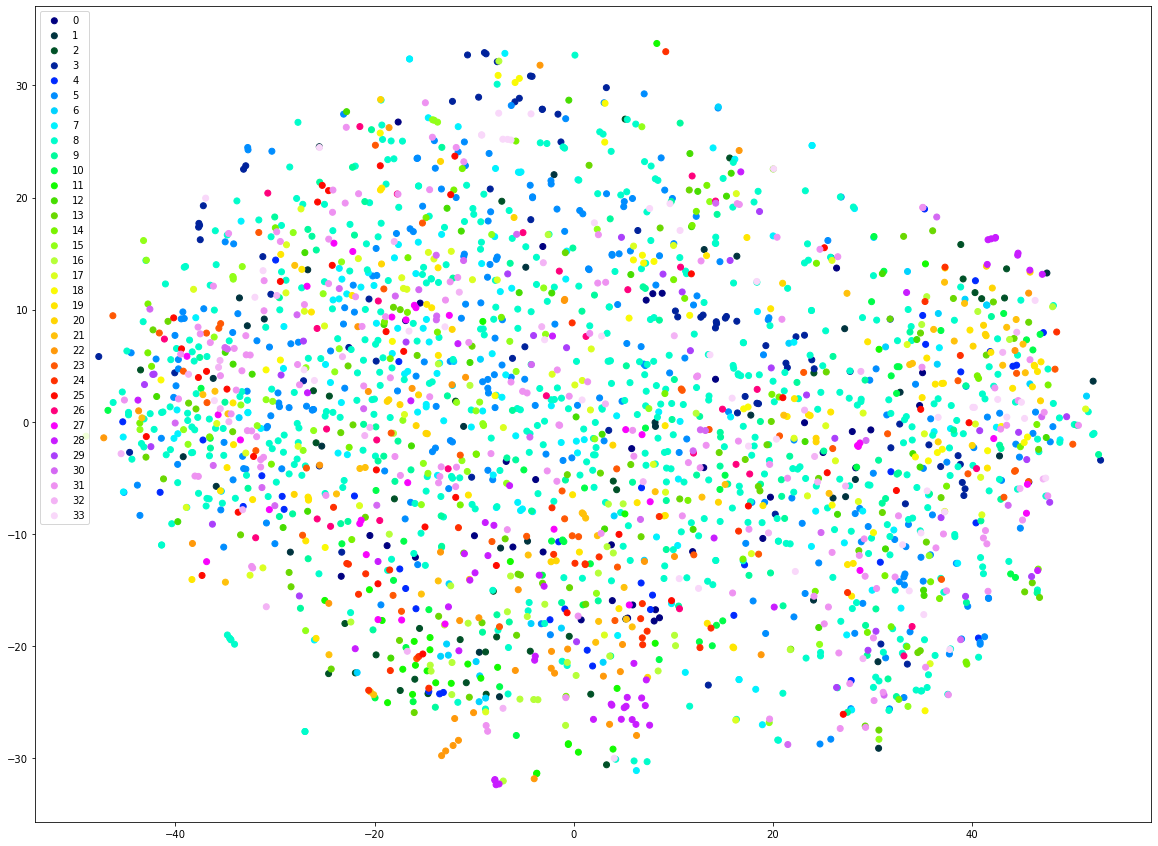

In [139]:
plt.figure(figsize=(20, 15))

for i in range(34):
    norm = Normalize(vmin=0, vmax=len(set(y)))
    color = plt.cm.gist_ncar(norm(i))
    plt.scatter(X_tsne[:, 0][y == i], X_tsne[:, 1][y == i], c=[color] * len(X_tsne[:, 0][y == i]), label=i)

plt.legend()
plt.show()